In [1]:
  from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install umap-learn
# !pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 889.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.6 MB/s eta 0:00:00


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from PIL import Image
import glob
from sklearn.cluster import KMeans
import pickle
import umap
import matplotlib.pyplot as plt
# import hdbscan
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split


In [5]:
df = pd.read_csv('/content/drive/MyDrive/CancerCell/24 April/NewDataSet_Ravaee_Feb2024/Dataset1 Scripts/features_JM28_3Lines_DNA_H2AX_ki67_20240401.csv')
# df = pd.read_csv('/content/drive/MyDrive/CancerCell/9 march/features_JM28_4Lines_DNA_H2AX_Ki67_20240131.csv')
# df = pd.read_csv('/content/drive/MyDrive/NewDataSet_Ravaee_Feb2024/Dataset1/features_JM28_4Lines_DNA_H2AX_Ki67_20240131.csv')
df.head()

#Is there anyway to label these data with Metadata_Well or Lines?

,UMAP1,UMAP2,Metadata_Lines,Metadata_Well,Metadata_Fr,ImageNumber,ObjectNumber,Metadata_Seq,FileName_DNA,Unnamed: 9,...,Intensity_StdIntensityEdge_DNA,Intensity_MaxIntensity_H2AX,AreaShape_Solidity,Intensity_StdIntensityEdge_Ki67,Intensity_MADIntensity_DNA,AreaShape_HuMoment_2,Intensity_MassDisplacement_H2AX,AreaShape_InertiaTensor_0_0,Intensity_MassDisplacement_DNA,Intensity_MassDisplacement_Ki67
0,-2.504595,-0.615515,555926,C03,0,13,5,0,Plate555926_WellC03_yH2AX_KI67_Seq0000_C03_000...,NaN,...,0.037975,0.039316,0.738162,0.087413,0.026984,0.034752,0.232533,230.023496,1.249155,2.530670
1,-1.282245,5.933108,555926,C03,0,13,7,0,Plate555926_WellC03_yH2AX_KI67_Seq0000_C03_000...,NaN,...,0.019298,0.041758,0.974891,0.004925,0.026252,0.000203,0.315801,86.777946,1.184209,0.385245
2,-1.671308,5.619950,555926,C03,0,13,13,0,Plate555926_WellC03_yH2AX_KI67_Seq0000_C03_000...,NaN,...,0.038834,0.038828,0.915789,0.010994,0.028083,0.000947,0.032313,85.468839,1.385450,0.517205
3,-1.422702,4.790870,555926,C03,0,13,15,0,Plate555926_WellC03_yH2AX_KI67_Seq0000_C03_000...,NaN,...,0.021407,0.038339,0.972588,0.034148,0.030769,0.000035,0.157187,66.895699,0.153982,0.647428
4,-2.226727,5.959783,555926,C03,0,13,16,0,Plate555926_WellC03_yH2AX_KI67_Seq0000_C03_000...,NaN,...,0.057893,0.045177,0.969016,0.013539,0.036630,0.000048,0.177965,112.718208,1.793111,0.940920


In [6]:
np.unique(df.Metadata_Lines.values)

array(['555926', '616215', 'GILA1'], dtype=object)

In [7]:
classes = list(np.unique(df.Metadata_Lines.values))
c = [classes.index(x) for x in df.Metadata_Lines.values]

In [8]:
df.iloc[:,11:].head()

,Intensity_MinIntensityEdge_H2AX,Intensity_IntegratedIntensity_DNA,Intensity_StdIntensity_Ki67,AreaShape_Area,Intensity_MinIntensity_Ki67,Intensity_IntegratedIntensity_H2AX,Intensity_MinIntensityEdge_DNA,Intensity_StdIntensityEdge_DNA,Intensity_MaxIntensity_H2AX,AreaShape_Solidity,Intensity_StdIntensityEdge_Ki67,Intensity_MADIntensity_DNA,AreaShape_HuMoment_2,Intensity_MassDisplacement_H2AX,AreaShape_InertiaTensor_0_0,Intensity_MassDisplacement_DNA,Intensity_MassDisplacement_Ki67
0,0.023932,37.126497,0.073898,265,0.039316,8.212699,0.063248,0.037975,0.039316,0.738162,0.087413,0.026984,0.034752,0.232533,230.023496,1.249155,2.530670
1,0.023199,130.347500,0.017517,893,0.026862,26.320391,0.061294,0.019298,0.041758,0.974891,0.004925,0.026252,0.000203,0.315801,86.777946,1.184209,0.385245
2,0.024908,120.346279,0.026004,870,0.025885,25.705739,0.048840,0.038834,0.038828,0.915789,0.010994,0.028083,0.000947,0.032313,85.468839,1.385450,0.517205
3,0.024664,132.091578,0.038769,887,0.032234,26.109402,0.041758,0.021407,0.038339,0.972588,0.034148,0.030769,0.000035,0.157187,66.895699,0.153982,0.647428
4,0.024420,301.635662,0.017981,1595,0.025885,47.279854,0.048840,0.057893,0.045177,0.969016,0.013539,0.036630,0.000048,0.177965,112.718208,1.793111,0.940920


In [9]:
data = df.iloc[:,11:].values
scaler = StandardScaler()
#scaler =   MinMaxScaler()
data = scaler.fit_transform(data)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, c, test_size=0.2)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


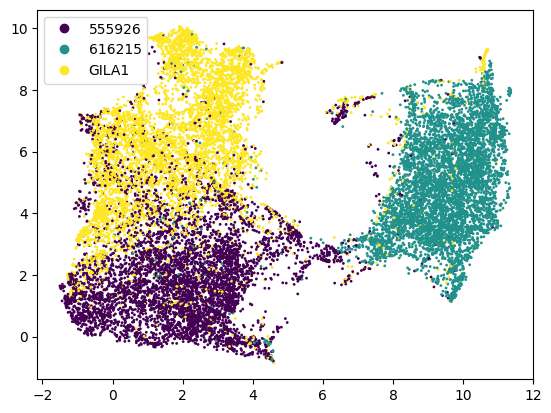

In [11]:
#_umap = umap.UMAP(n_neighbors=7 , min_dist=1e-11 , metric='manhattan')
_umap = umap.UMAP(random_state=123)
embbedings_data = _umap.fit_transform(X_train)
scatter  = plt.scatter(embbedings_data[:,0], embbedings_data[:,1],s=1,c=y_train)
plt.legend(handles=scatter.legend_elements()[0], labels=list(np.unique(df.Metadata_Lines.values)))
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(embbedings_data)
labels = kmeans.predict(embbedings_data)
centroids = kmeans.cluster_centers_
distances = [np.linalg.norm(x-centroids[labels[i]]) for i,x in enumerate(embbedings_data)]

threshold = 2*np.std(distances)

_data = embbedings_data[np.where(distances < threshold)]
clusters = kmeans.labels_[np.where(distances < threshold)]
cell_lines = np.asarray(y_train)
cell_lines = cell_lines[np.where(distances < threshold)]

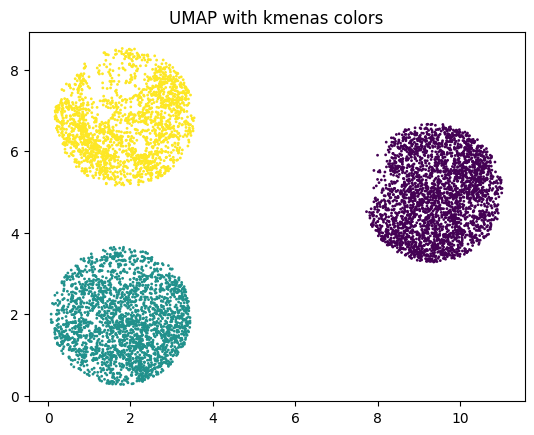

In [13]:
scatter  = plt.scatter(_data[:,0], _data[:,1],s=1,c=clusters)
plt.title("UMAP with kmenas colors")
plt.show()

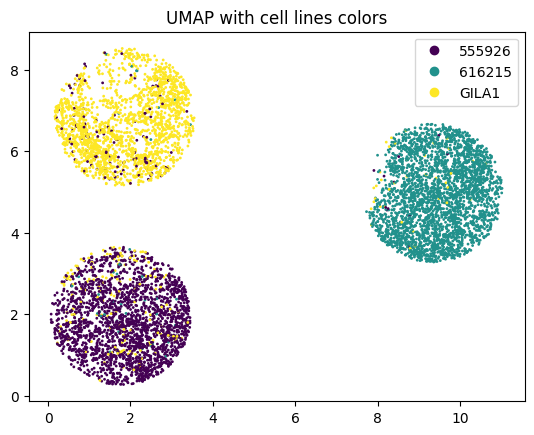

In [15]:
scatter  = plt.scatter(_data[:,0], _data[:,1],s=1,c=cell_lines)
plt.legend(handles=scatter.legend_elements()[0], labels=list(np.unique(df.Metadata_Lines.values)))
plt.title("UMAP with cell lines colors")
plt.show()

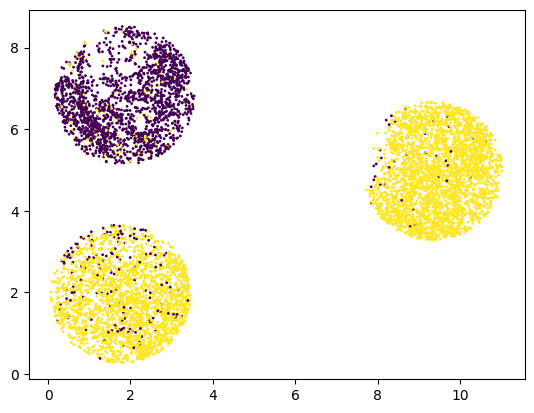

In [52]:
c = cell_lines
scatter  = plt.scatter(_data[:,0], _data[:,1],s=1, c=np.where(c==2,0,1))

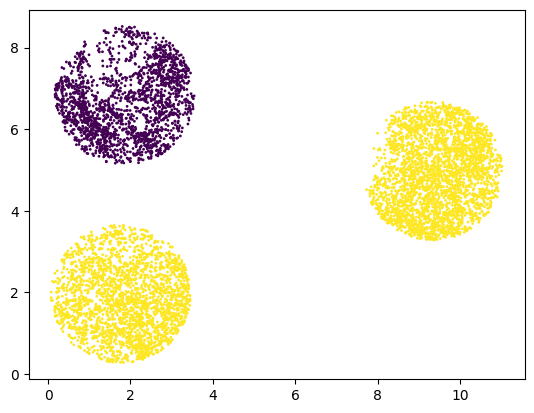

In [53]:
c = clusters
scatter  = plt.scatter(_data[:,0], _data[:,1],s=1, c=np.where(c==2,0,1))

In [54]:
count = 0
for i in range(clusters.shape[0]):
  if clusters[i]==2 and cell_lines[i]==2:
    count+=1
print(count)

1873


In [56]:
(2246+2899+1873)/cell_lines.shape[0]

0.9486347661530143

In [27]:
from sklearn import metrics

In [33]:
metrics.rand_score(clusters, cell_lines)

0.9392806016540831

In [ ]:
pickle.dump(kmeans, open('kmeans.pickle', "wb"))
pickle.dump(_umap, open('_umap.pickle', "wb"))

In [ ]:
# load model
kmeans = pickle.load(open('kmeans.pickle', "rb"))
_umap = pickle.load(open('_umap.pickle', "rb"))

In [ ]:
embbedings_test = _umap.transform(X_test)
labels = kmeans.predict(embbedings_test)
centroids = kmeans.cluster_centers_
distances = [np.linalg.norm(x-centroids[labels[i]]) for i,x in enumerate(embbedings_test)]

threshold = 2*np.std(distances)

embbedings_test = embbedings_test[np.where(distances < threshold)]
# clusters = kmeans.labels_[np.where(distances < threshold)]
# cell_lines = np.asarray(y_train)
# cell_lines = cell_lines[np.where(distances < threshold)]

In [ ]:
x = np.vstack([_data,embbedings_test])

In [ ]:
y = np.hstack([np.zeros(_data.shape[0]),np.ones(embbedings_test.shape[0])])

In [ ]:
_data.shape

(7623, 2)

In [ ]:
embbedings_test.shape

(1909, 2)

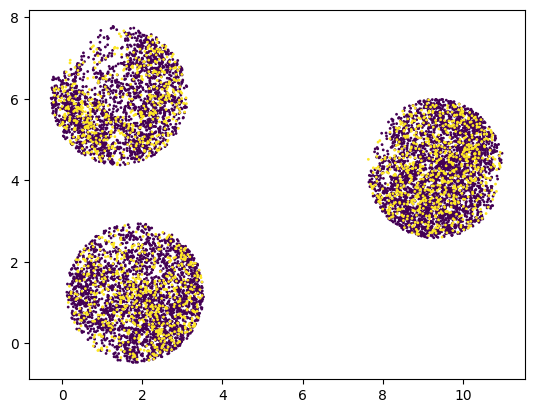

In [ ]:
plt.scatter(x[:,0],x[:,1], s=1,c=y)